# Terry Stops #

Let's import all the necessary libraries to analyze the data. The necessary libraries and other functions can be found in the file named `functions.py`.

In [128]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
from functions import *
%matplotlib inline

Read the data and look at the first rows of data.

In [66]:
df = pd.read_csv('Terry_Stops.csv')
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


At first glance we can see that we have some missing data in the Subjet Age Group as well as Initial Call Type. Also some NaN values on Officer Squad. Let's dig in a little more to view what we hyave to work with.

In [67]:
print(df.isna().sum())
print('----------------------------------------------------------------------------')
print(df.info())

Subject Age Group             0
Subject ID                    0
GO / SC Num                   0
Terry Stop ID                 0
Stop Resolution               0
Weapon Type                   0
Officer ID                    0
Officer YOB                   0
Officer Gender                0
Officer Race                  0
Subject Perceived Race        0
Subject Perceived Gender      0
Reported Date                 0
Reported Time                 0
Initial Call Type             0
Final Call Type               0
Call Type                     0
Officer Squad               604
Arrest Flag                   0
Frisk Flag                    0
Precinct                      0
Sector                        0
Beat                          0
dtype: int64
----------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47213 entries, 0 to 47212
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------

It appears as though we have a lot of information to work with and the only feature that has missing data is the `Officer Squad` feature.

Let's cleanup the names of the columns to make it easier to code.

In [68]:
list(df.columns)

['Subject Age Group',
 'Subject ID',
 'GO / SC Num',
 'Terry Stop ID',
 'Stop Resolution',
 'Weapon Type',
 'Officer ID',
 'Officer YOB',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Reported Date',
 'Reported Time',
 'Initial Call Type',
 'Final Call Type',
 'Call Type',
 'Officer Squad',
 'Arrest Flag',
 'Frisk Flag',
 'Precinct',
 'Sector',
 'Beat']

In [69]:
update_col_names = {'Subject Age Group':'sub_age_group', 'Subject ID':'sub_id', 
                    'GO / SC Num':'go_num_sc_num','Terry Stop ID':'terryS_id', 
                    'Stop Resolution':'stop_resolution','Weapon Type':'weapon_type',
                    'Officer ID':'officer_id','Officer YOB':'officer_YOB',
                    'Officer Gender':'officer_gender','Officer Race':'officer_race',
                    'Subject Perceived Race':'sub_perceived_race','Subject Perceived Gender':'sub_perceived_gender',
                    'Reported Date':'reported_date','Reported Time':'reported_time',
                    'Initial Call Type':'initial_calltype','Final Call Type':'final_calltype',
                    'Call Type':'call_type','Officer Squad':'officer_squad',
                    'Arrest Flag':'arrest_flag','Frisk Flag':'frisk_flag',
                    'Precinct':'precinct','Sector':'sector','Beat':'beat'}
df.rename(columns=update_col_names, inplace=True)
df.head()

,sub_age_group,sub_id,go_num_sc_num,terryS_id,stop_resolution,weapon_type,officer_id,officer_YOB,officer_gender,officer_race,...,reported_time,initial_calltype,final_calltype,call_type,officer_squad,arrest_flag,frisk_flag,precinct,sector,beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


Much better!

## Creating Features from the Data ##

Part of the data that the columns tell us is the officers year of birth, but it does not tell us the officer's age. It seems more reasonable to have an age feature for a cop to help with our prediction model. 

We will use the officer's year of birth and the date that the reported stop was made to figure out the age of the officer when he made the stop.

In [70]:
df.officer_YOB.sort_values(ascending=True)

27062    1900
1058     1900
25205    1900
1080     1900
46088    1900
         ... 
43572    1998
38661    1998
36743    1998
37464    1998
27451    1998
Name: officer_YOB, Length: 47213, dtype: int64

In [71]:
for x in range(len(df.reported_date)):
    df.reported_date = df.reported_date[x][0:10]
    df['year_reported'] = df.reported_date[x][0:4]

In [72]:
df['officer_age'] = df.year_reported.astype(int) - df.officer_YOB

In [73]:
df['officer_age'].sort_values(ascending=False)

35978    115
36308    115
24902    115
38084    115
38025    115
        ... 
11461     17
27451     17
37464     17
12988     17
12044     17
Name: officer_age, Length: 47213, dtype: int64

It is highly unlikely that there were 115 year old officers doing stops. Or have officers younger than 21 years. We will filter out those along with officers that are around the 80 year old mark.

In [74]:
df = df[df.officer_age >= 21]

In [75]:
df = df[df.officer_age <= 80]

In [76]:
df['officer_age'].sort_values(ascending=False)

5328     69
3869     69
182      67
39288    67
39353    67
         ..
27709    21
45996    21
37710    21
9224     21
24642    21
Name: officer_age, Length: 44907, dtype: int64

Much better and reasonable.

Now let's categorize the feature `weapon_type` by replacing no weapons found values as 0 and weapons found as 1.

In [77]:
df.weapon_type = df.weapon_type.astype(str)
df.weapon_type.unique()

array(['None', 'Firearm Other', 'Lethal Cutting Instrument', 'Handgun',
       '-', 'Club, Blackjack, Brass Knuckles',
       'Knife/Cutting/Stabbing Instrument', 'Other Firearm', 'Rifle',
       'Fire/Incendiary Device', 'Blunt Object/Striking Implement',
       'Firearm (unk type)', 'Mace/Pepper Spray', 'None/Not Applicable',
       'Club', 'Firearm', 'Taser/Stun Gun', 'Shotgun', 'Brass Knuckles',
       'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)'], dtype=object)

In [78]:
list_to_replace_weapons = ['1', '-', 'None', 'Knife/Cutting/Stabbing Instrument',
       'Other Firearm', 'Rifle', 'Fire/Incendiary Device',
       'Blunt Object/Striking Implement', 'Firearm Other',
       'Lethal Cutting Instrument', 'Handgun', 'Firearm (unk type)',
       'Mace/Pepper Spray', 'None/Not Applicable', 'Club',
       'Club, Blackjack, Brass Knuckles', 'Firearm', 'Taser/Stun Gun',
       'Shotgun', 'Brass Knuckles', 'Automatic Handgun', 'Blackjack',
       'Personal Weapons (hands, feet, etc.)']

df.weapon_type.replace(to_replace='None',value=0, inplace=True)
df.weapon_type.replace(to_replace=list_to_replace_weapons, value=1,inplace=True)

In [79]:
df.weapon_type.head()

0    0
1    0
2    0
3    0
4    0
Name: weapon_type, dtype: int64

In [80]:
df.weapon_type.value_counts()

0    32051
1    12856
Name: weapon_type, dtype: int64

## Rest of the columns ##

Because most of the features that we are going to be using for our model are categorical, we are going to set the `datatype` as `category`.

In [81]:
category_features = ['sub_age_group','officer_gender','officer_race','sub_perceived_race','sub_perceived_gender',
                     'frisk_flag','call_type']

In [82]:
for x in category_features:
    df[x] = df[x].astype('category').cat.as_ordered()

In [83]:
df[category_features].dtypes

sub_age_group           category
officer_gender          category
officer_race            category
sub_perceived_race      category
sub_perceived_gender    category
frisk_flag              category
call_type               category
dtype: object

Great! Now let's get the target column with the proper values.

## Encoding target column ##

In [84]:
df.stop_resolution.value_counts()

Field Contact               17808
Offense Report              15151
Arrest                      11059
Referred for Prosecution      717
Citation / Infraction         172
Name: stop_resolution, dtype: int64

In [85]:
new_target_values = {'Arrest':1,
                     'Field Contact':0,
                     'Citation / Infraction':0,
                     'Offense Report':0,
                     'Referred for Prosecution':0}

In [86]:
df['stop_resolution'].replace(new_target_values, inplace=True)

## Splitting the data ##

It's time to split the data! We set a variable named `x_feats` as the `X` variable and the `stop_resolution` column as our target column. Since we have set the values of our target to bool -meaning 1 if an arrest was made and 0 if there was not an arrest made- this makes our problem/model follow a binary classification process.

In [87]:
x_feats = ['sub_age_group','weapon_type','officer_gender','officer_race','sub_perceived_race',
           'sub_perceived_gender','frisk_flag','call_type','officer_age']

In [88]:
X = df[x_feats]
y = df['stop_resolution']

We do 2 train splits in order to have a piece of the data that we don't touch at all. In the mean time we will be concentrating our learning models on the X_train, X_test, y_train, y_test

In [89]:
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X,y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train_all, y_train_all, random_state=42)

In order for our models to be read by the algorithms it is necessarily to properly process the data. For this our X_train and X_test will be processed with `OneHotEncoder`.

In [90]:
ohe = OneHotEncoder(handle_unknown='ignore')
X_train_ohe = ohe.fit_transform(X_train)
X_test_ohe = ohe.transform(X_test)

We want to see how the model performs at its base and without any changes to hyperparameters or regularisation.

In [91]:
logreg = LogisticRegression()

In [92]:
model_1 = logreg.fit(X_train_ohe, y_train)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
y_hat_train = logreg.predict(X_train_ohe)
y_hat_test = logreg.predict(X_test_ohe)

In [94]:
print('F1 score for training data: {}'.format(f1_score(y_train, y_hat_train)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test, y_hat_test)))

F1 score for training data: 0.11530187867488885
-------------------------------------------
F1 score for testing data: 0.09739427595044853


F1 score appears to be at 9% which is not good.

Let's visualize this with a confusion matrix.

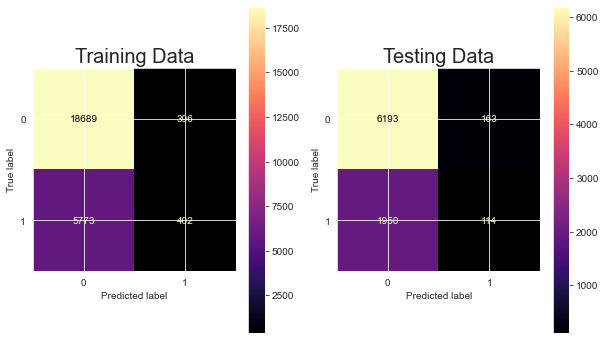

In [95]:
plot_cf(logreg,X_train_ohe,y_train,X_test_ohe,y_test)

## Model 2 - Adding Synthetic Data ##

In [96]:
smote = SMOTE()
X_train_resampled, y_train_resampled  = smote.fit_sample(X_train_ohe, y_train)

In [97]:
print(pd.Series(y_train_resampled).value_counts())
print('-------------------------------------')
print(pd.Series(y_test_resampled).value_counts())

1    19085
0    19085
Name: stop_resolution, dtype: int64
-------------------------------------
1    6356
0    6356
Name: stop_resolution, dtype: int64


In [98]:
model_2 = logreg.fit(X_train_resampled, y_train_resampled)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
y_hat_train2 = model_2.predict(X_train_resampled)
y_hat_test2 = model_2.predict(X_test_resampled)

In [100]:
print('F1 score for training data: {}'.format(f1_score(y_train_resampled, y_hat_train2)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test_resampled, y_hat_test2)))

F1 score for training data: 0.7236691010977906
-------------------------------------------
F1 score for testing data: 0.7199118700082621


We have much better results when adding the synthetic data. Let's see if we can tweak some other parameters to increase our model's performance.

Let's see our errors using the confusion matrix.

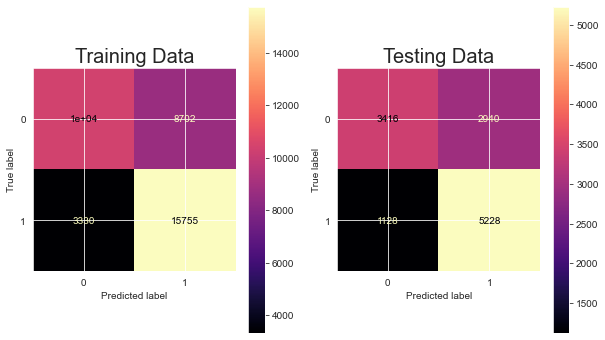

In [101]:
plot_cf(logreg,X_train_resampled,y_train_resampled,X_test_resampled,y_test_resampled)

It appears as though even though our model is doing better f1 score wise, our model still has a lot of False Positives  and a few False Negatives.

## Model 3 - L1 penalty ##

By default, the object LogisticRegression has the penalty enabled to `l2`, this time we will change it to `l1`.

In [102]:
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear')

In [103]:
model_3 = logreg_l1.fit(X_train_resampled, y_train_resampled)

In [104]:
y_hat_train3 = model_3.predict(X_train_resampled)
y_hat_test3 = model_3.predict(X_test_resampled)

In [105]:
print('F1 score for training data: {}'.format(f1_score(y_train_resampled, y_hat_train3)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test_resampled, y_hat_test3)))

F1 score for training data: 0.7240516786378135
-------------------------------------------
F1 score for testing data: 0.7193284249638754


Marginally better.

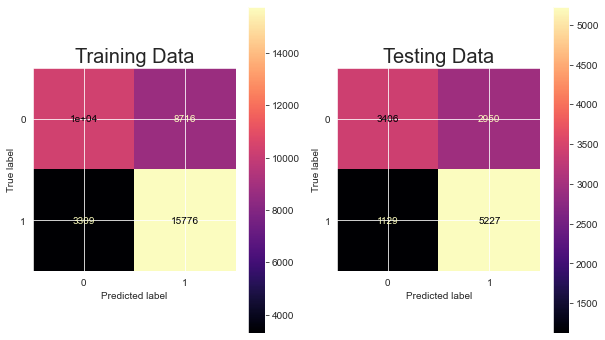

In [106]:
plot_cf(logreg_l1, X_train_resampled, y_train_resampled,X_test_resampled,y_test_resampled)

## Model 4 - C regularization ##

Let's create a list with values that are smaller than one that we can loop over to see if it can improve the performatnce of our model.

In [107]:
c_values = [1e-1,1e-2,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]

In [108]:
for x in c_values:
    logreg_c = LogisticRegression(C = x)
    model_4 = logreg_c.fit(X_train_resampled,y_train_resampled)
    y_hat_train4 = model_4.predict(X_train_resampled)
    y_hat_test4 = model_4.predict(X_test_resampled)
    
    print('C_value: {}'.format(x))
    print('F1 score for training data: {}'.format(f1_score(y_train_resampled, y_hat_train4)))
    print('F1 score for testing data: {}'.format(f1_score(y_test_resampled, y_hat_test4)))
    print('-------------------------------------------')

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C_value: 0.1
F1 score for training data: 0.7239669421487603
F1 score for testing data: 0.7217373376400247
-------------------------------------------
C_value: 0.01
F1 score for training data: 0.7242893880430579
F1 score for testing data: 0.7247164300753922
-------------------------------------------
C_value: 0.0001
F1 score for training data: 0.664246911206192
F1 score for testing data: 0.6584659913169321
-------------------------------------------
C_value: 1e-05
F1 score for training data: 0.6535359953081473
F1 score for testing data: 0.6407251824010612
-------------------------------------------
C_value: 1e-06
F1 score for training data: 0.6870099786172488
F1 score for testing data: 0.6818700114025086
-------------------------------------------
C_value: 1e-07
F1 score for training data: 0.6889096075297461
F1 score for testing data: 0.682356087450692
-------------------------------------------
C_value: 1e-08
F1 score for training data: 0.688951036533937
F1 score for testing data: 0.68

It seems that changing the value of c does not improve the f1 score. We have found our optimal C value being 1e-2.

Now let's move on to class weights to check on how it affects our model.

LogisticRegression(C=0.01, fit_intercept=False)
AUC for None: 0.7263866126900604
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight='balanced', fit_intercept=False)
AUC for Balanced: 0.7263866126900604
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, fit_intercept=False)
AUC for 2 to 1: 0.7263940386649721
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 10}, fit_intercept=False)
AUC for 10 to 1: 0.724489065697501
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 1, 1: 100}, fit_intercept=False)
AUC for 100 to 1: 0.7215322033837891
-------------------------------------------------------------------------------------
LogisticRegression(C=0.01, class_weight={0: 

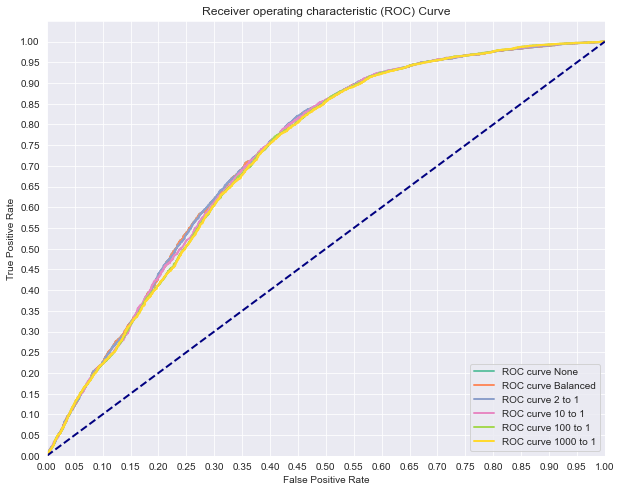

In [109]:
sns.set_style('darkgrid')
# Now let's compare a few different regularization performances on the dataset:
weights = [None, 'balanced', {1:2, 0:1}, {1:10, 0:1}, {1:100, 0:1}, {1:1000, 0:1}]
names = ['None', 'Balanced', '2 to 1', '10 to 1', '100 to 1', '1000 to 1']
colors = sns.color_palette('Set2')

plt.figure(figsize=(10,8))

for n, weight in enumerate(weights):
    # Fit a model
    logreg = LogisticRegression(fit_intercept=False, C=1e-2, class_weight=weight, solver='lbfgs')
    model_log = logreg.fit(X_train_resampled, y_train_resampled)
    print(model_log)

    # Predict
    y_hat_test5 = logreg.predict(X_test_resampled)

    y_score = logreg.fit(X_train_resampled, y_train_resampled).decision_function(X_test_resampled)

    fpr, tpr, thresholds = roc_curve(y_test_resampled, y_score)
    
    print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
    print('-------------------------------------------------------------------------------------')
    lw = 2
    plt.plot(fpr, tpr, color=colors[n],
             lw=lw, label='ROC curve {}'.format(names[n]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [110]:
#X_train_all ???? Log model

## KNN Model ##

In [111]:
X.weapon_type = X.weapon_type.astype(bool)

/Users/edgarbarron/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [112]:
X.dtypes

sub_age_group           category
weapon_type                 bool
officer_gender          category
officer_race            category
sub_perceived_race      category
sub_perceived_gender    category
frisk_flag              category
call_type               category
officer_age                int64
dtype: object

In [113]:
int_selector = make_column_selector(dtype_include='int64', dtype_exclude=['category','bool'])
rest_selector = make_column_selector(dtype_include=['category','bool'], dtype_exclude='int64')
all_selector = make_column_selector(dtype_include=['category','bool','int64'])

In [114]:
knn_preprocessing = make_column_transformer((StandardScaler(), int_selector),
                                  (OneHotEncoder(handle_unknown='ignore'), rest_selector))

In [115]:
X_train_processed = knn_preprocessing.fit_transform(X_train)
X_test_processed = knn_preprocessing.transform(X_test)

In [116]:
knn_pipe1 = make_pipeline(KNeighborsClassifier())

In [117]:
model_5 = knn_pipe1.fit(X_train_processed,y_train)

In [118]:
y_hat_train6 = model_5.predict(X_train_processed)
y_hat_test6 = model_5.predict(X_test_processed)

In [119]:
print('F1 score for training data: {}'.format(f1_score(y_train, y_hat_train6)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test, y_hat_test6)))

F1 score for training data: 0.4995060264769808
-------------------------------------------
F1 score for testing data: 0.30751104565537557


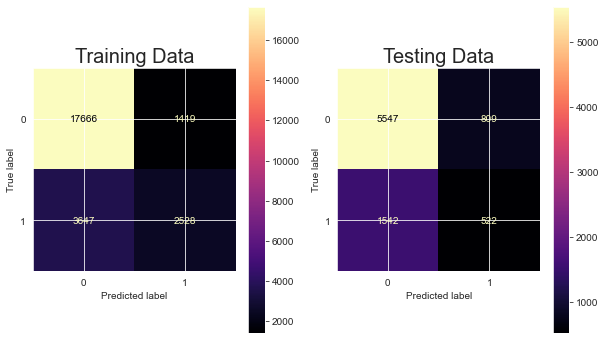

In [120]:
plot_cf(model_5,X_train_processed,y_train,X_test_processed,y_test)

This is our base model for the data. Way better than the first base LogisticRegression model! Let's add synthetic data to see how our model performs.

In [121]:
X_train_smote, y_train_smote = smote.fit_sample(X_train_processed,y_train)

In [122]:
model_6 = knn_pipe1.fit(X_train_smote,y_train_smote)

In [124]:
y_hat_train7 = model_6.predict(X_train_smote)
y_hat_test7 = model_6.predict(X_test_processed)

In [125]:
print('F1 score for training data: {}'.format(f1_score(y_train_smote, y_hat_train7)))
print('-------------------------------------------')
print('F1 score for testing data: {}'.format(f1_score(y_test, y_hat_test7)))

F1 score for training data: 0.8125359545784249
-------------------------------------------
F1 score for testing data: 0.43887961417176774


It appears as though our data is overfitting a bit on the training data.

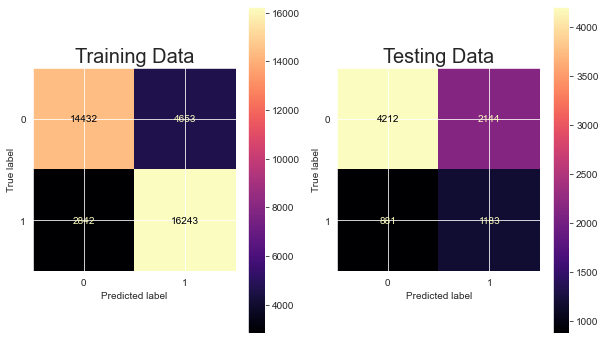

In [127]:
plot_cf(model_6, X_train_smote, y_train_smote, X_test_processed,y_test)

In [130]:
find_best_k(X_train_smote, y_train_smote,X_test_processed,y_test, min_k=1, max_k=25)

Best value for k: 23
F1 Score: 0.48758893280632415


In [131]:
# implement this k do a GridSearch()

In [132]:
#DecisionTrees and #Esemble Methods